# Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Загрузка и подготовка данных

Данные https://drive.google.com/file/d/1UTQ4oqnKEsbuPZKL2eyhF2bfDTDtRLdQ/view?usp=sharing


In [ ]:
# импортируем данные 

df = pd.read_csv("marketing_campaign.csv", sep='\t') 

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# смотрим данные на предмет полноты. Видим, что в атрибуте "Доходы" отсутсвует часть данных. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [ ]:
# восполняем пропусков в данных
# деляем метрику, кторая позволит отследить, насколько наши данные изменились после восполнения пропусков

print(f"Среднее значение: {df.Income.mean()}" )
print(f"Медиана: {df.Income.median()}" )

Среднее значение: 52247.25135379061
Медиана: 51381.5


In [ ]:
df['Income'].fillna(df.groupby('Education')['Income'].transform('median'), inplace=True)

In [ ]:
# смотрим, насколько изменились метрики после восполнения пропусков

print(f"Среднее значение: {df.Income.mean()}" )
print(f"Медиана: {df.Income.median()}" )

Среднее значение: 52242.59486607143
Медиана: 51498.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# более детально знакомимся с данными, смотрим их на аномалии и выбросы

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52242.594866,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25039.061738,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51498.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# посмотрим на столбцы, сдержащие категории (образование и семейный статус)

df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

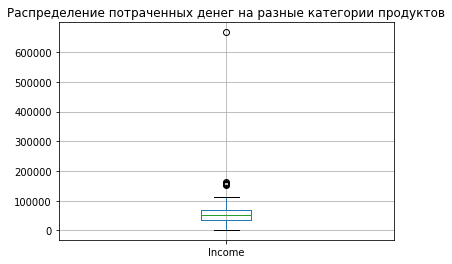

In [ ]:
# проверяю информацию о доходах на предмет выбросов 

df['Income'].plot(kind='box',
                                  title='Распределение потраченных денег на разные категории продуктов', grid=True)


При подготовке данных к дальнейшему анализу были восполнены пропуски. В целом данные можно охарактеризовать как полные и достаточно качественные, однако в информации о доходах явно наблюдаются выбросы. 

# EDA - 

**Работа с возрастными показателями**

In [ ]:
# преобразуем информацию с годом рождения клиента в информацию о возрасте клиента 

df['Age'] = 2021 - df['Year_Birth']
df['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

Text(0.5, 1.0, 'Возраст клиентов')

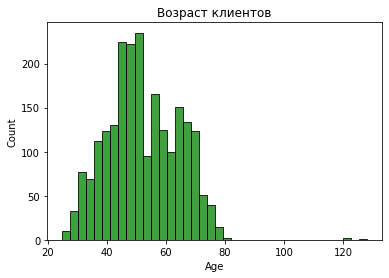

In [ ]:
sns.histplot(df['Age'], color='green')
plt.title('Возраст клиентов')

In [ ]:
print(f"Минимальный возраст клиента: {df.Age.min()}")
print(f"Средний возраст клиента: {round(df.Age.mean())}")
print(f"Максимальный возраст клиента: {df.Age.max()}")

Минимальный возраст клиента: 25
Средний возраст клиента: 52
Максимальный возраст клиента: 128


Вызывает сомнение доствореность информации о том, что клиенту больше 100 лет.

In [ ]:
# удалим выбросы

df.drop(df[df.Age > 100]. index, inplace=True)

In [ ]:
# создадим функцию, которая условно будет делить наших клиентов на три возрастных сегмента 

def segment_age(data):
  if data <= 40: 
    return "20-40 years"
  elif data <= 60:  
    return "41-60 years"
  else: 
    return "over 60 year"

In [ ]:
# делим нашу аудиторию на три сегмента по возрастному признаку

df['segment_of_age'] = df['Age'].apply(segment_age) 

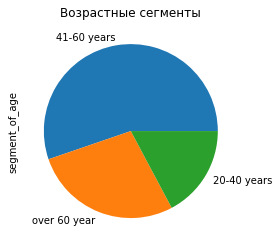

In [ ]:
pie_segment_of_age = df['segment_of_age'].value_counts() 
pie_segment_of_age.plot(kind='pie', title='Возрастные сегменты')

Анализируя диаграмму, можно сказать, что большая часть наших клиентов находится в сегменте от 41 года до 60

**Уровень образования покупателей**

In [ ]:
# какое образование имеют наши клиенты 

education = df.groupby(['Education'])['ID'].count().reset_index() 
education

,Education,ID
0,2n Cycle,201
1,Basic,54
2,Graduation,1127
3,Master,370
4,PhD,485


Text(0.5, 1.0, 'Информация об уровне образования клиентов')

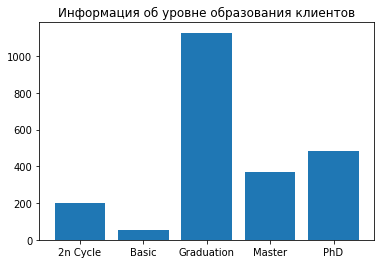

In [ ]:
plt.bar(education['Education'], education['ID'])
plt.title("Информация об уровне образования клиентов")

Большая часть наших клиентов имеет достаточно высокую степень образования (выпускники и кандидаты наук) 

In [ ]:
# создадим функцию, которая преобразует информацию об уровне образования в числовые значения

def level_education(edu): 
  if edu == '2n Cycle': 
    return 1
  elif edu == 'Basic': 
    return 2
  elif edu == 'Graduation': 
    return 3 
  elif edu == 'Master':
    return 4 
  elif edu == 'PhD':
    return 5

In [ ]:
df['level_edu'] = df['Education'].apply(level_education)

In [ ]:
df.level_edu.unique()

array([3, 5, 4, 2, 1])

**Семейное положение**

In [ ]:
# рассматриваем наших клиентов с точки зрения семейного положения

df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

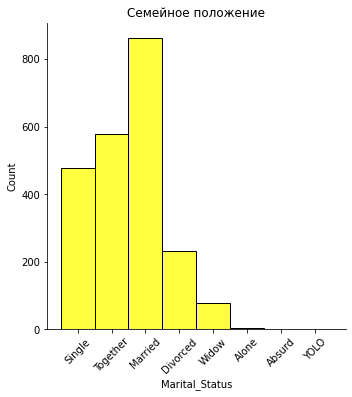

In [ ]:
# визуализируем информацию о семейных статусах

sns.displot(df['Marital_Status'], color='yellow')
plt.xticks(rotation=45)
plt.title('Семейное положение')
plt.show()

In [ ]:
# создадим функцию, которая условно будет определять кол-во людей (пара или один), исходя из семейного положения

def count_people(info): 
  if (info == 'Single' or 
      info == 'Divorced' or 
      info == 'Widow' or 
      info == 'Alone' or 
      info == 'Absurd' or
      info == 'YOLO'):
    return 1
  elif (info == 'Together' or info =='Married' ):
    return 2

In [ ]:
# создадим столбец с вышеуказанной информацией 

df['Count_people'] = df['Marital_Status'].apply(count_people)

In [ ]:
# посмотрим, кого больше (пар или одиночек) 
# людей, находящихся в отношениях, больше

df['Count_people'].value_counts()


2    1443
1     794
Name: Count_people, dtype: int64

Text(0.5, 1.0, 'Количество одиноких и в отношениях клиентов')

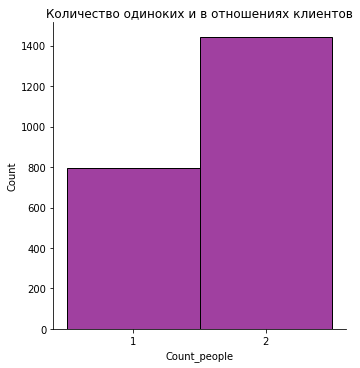

In [ ]:
sns.displot(df['Count_people'].sort_values().astype(str), color='purple') 
plt.title('Количество одиноких и в отношениях клиентов')

In [ ]:
# добавим к столбцу "кол-во людей" данные о детях, чтобы получить общую численность семей

df['Number_of_family'] = df['Count_people'] + df['Kidhome'] + df['Teenhome'] 

Text(0.5, 1.0, 'Общее количество людей в семьях клиентов')

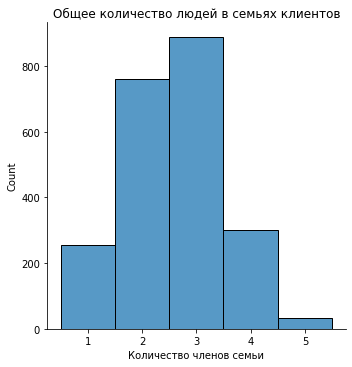

In [ ]:
sns.displot(df['Number_of_family'].sort_values().astype(str)) 
plt.xlabel('Количество членов семьи')
plt.title('Общее количество людей в семьях клиентов')

In [ ]:
# посмотрим общее количество детей в семьях 

df['Total_kids'] = df['Kidhome'] + df['Teenhome']

Text(0.5, 1.0, 'Количество детей в семьях')

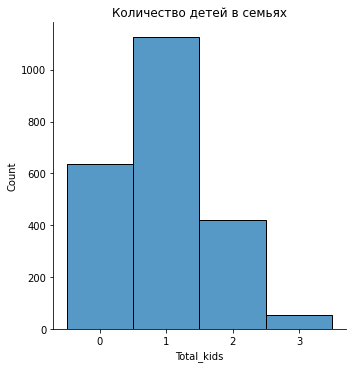

In [ ]:
# визуализируем 

sns.displot(df['Total_kids'].sort_values().astype(str)) 
plt.title('Количество детей в семьях')

In [ ]:
# количество членов семьи 
top_number_of_family = df['Number_of_family'].value_counts()
top_number_of_family

3    889
2    761
4    301
1    254
5     32
Name: Number_of_family, dtype: int64

In [ ]:
# количество детей в семьях 

df.Total_kids.value_counts()

1    1126
0     637
2     421
3      53
Name: Total_kids, dtype: int64

Среди клиентов в два раза больше людей, которые находятся в паре, нежели одни, а также большая часть людей проживает в составе от 2 до 4 человек в семье. Чаще всего в семьях всего один ребенок

**Как давно клиенты с нами**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['2021'] = '01-01-2021'

df['2021'] = pd.to_datetime(df['2021'])

In [ ]:
# посчитаем, сколько лет с нами клиенты


df['Customer_year'] = (df['2021'].dt.year) - (df['Dt_Customer'].dt.year)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '\xa0Продолжительность сотрудничества с клиентами')

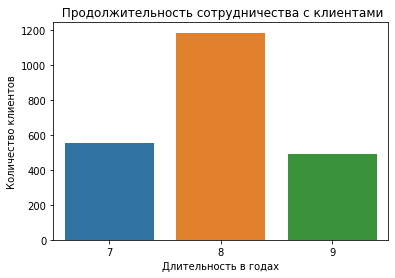

In [ ]:
sns.countplot(df['Customer_year'])
plt.xlabel('Длительность в годах')
plt.ylabel('Количество клиентов')
plt.title(' Продолжительность сотрудничества с клиентами')


Наибольшее число клиентов с нами уже 8 лет

**Ежегодный доход клиентов**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ежегодные доходы клиентов')

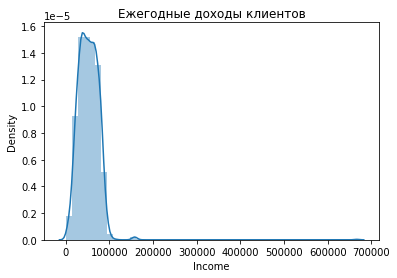

In [ ]:
# визуализируем информацию о доходах клиентов 

sns.distplot(df['Income'])
plt.title('Ежегодные доходы клиентов')

In [ ]:
# посмотрим основные показатели по доходам 

df['Income'].describe()

count      2237.000000
mean      52232.033304
std       25044.375878
min        1730.000000
25%       35523.000000
50%       51479.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

Достаточно большой размах в доходах клиентов

**Давность последней покупки**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Давность покупки')

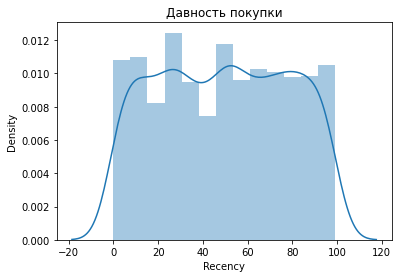

In [ ]:
sns.distplot(df['Recency'])
plt.title('Давность покупки') 

In [ ]:
df['Recency'].describe()


count    2237.000000
mean       49.104604
std        28.956073
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Средняя давность последней покупки достаточно велика, неплохо было бы в дальнейшем порабтать над ее сокращением

**Жалобы клиентов**

In [ ]:
# сколько клиентов жаловалось за последние два года 

df.Complain.value_counts()

0    2217
1      20
Name: Complain, dtype: int64

Text(0.5, 1.0, 'Отсутствие / наличие жалоб от клиентов')

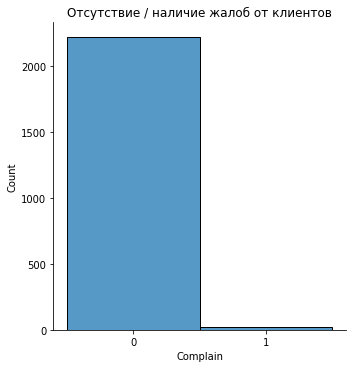

In [ ]:
sns.displot(df['Complain'].sort_values().astype(str)) 
plt.title('Отсутствие / наличие жалоб от клиентов')

За последние два года клиенты жаловались достаточно редко. А длительность пребывания с нами клиентов достаточно велика. В среднем - 8 лет. 

**Общие траты**

In [ ]:
# посчитаем общие затраты клиентов

df['Purchase__amount'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                          df['MntFishProducts' ] +df['MntSweetProducts'] + df['MntGoldProds'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Общие траты клиентов на все категории')

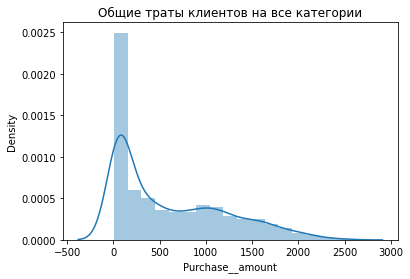

In [ ]:
sns.distplot(df['Purchase__amount'])
plt.title('Общие траты клиентов на все категории')


На диаграмме можно хорошо увидеть, что распределение трат неравномерно

**Согласие клиентов на кампании**

In [ ]:
# объединяем в одиный столбец все кампании 

df['accepted_cmp'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4']
                      + df['AcceptedCmp5'] + df['Response'])

df['accepted_cmp']= np.where(df['accepted_cmp'] > 0, 1, 0)

In [ ]:
# посмотрим как часто люди участвуют в маркетинговых кампаниях 

df['accepted_cmp'].value_counts()

0    1629
1     608
Name: accepted_cmp, dtype: int64

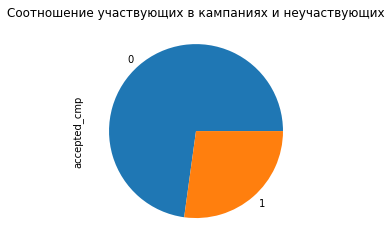

In [ ]:
# визуалищация 

accapt_cmp = df['accepted_cmp'].value_counts()

accapt_cmp.plot(kind='pie', title='Соотношение участвующих в кампаниях и неучаствующих')


Большая часть клиентов не участвует в маркетинговых кампаниях

**Количество покупок**

In [ ]:
df['Total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение числа покупок среди клиентов')

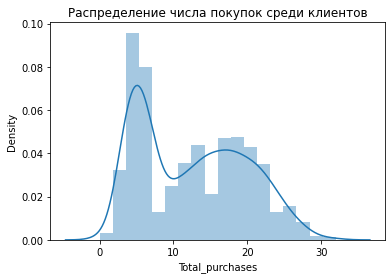

In [ ]:
sns.distplot(df['Total_purchases'].sort_values().astype(str))
plt.title('Распределение числа покупок среди клиентов')


# Гипотезы и их проверка

**Корреляция между затратами на вино и фрукты** (возможно, что это связано и можно в дальнейшем учитывать при построении маркетинговых предложений)

In [ ]:
df[['MntWines', 'MntFruits']].corr()

,MntWines,MntFruits
MntWines,1.000000,0.388518
MntFruits,0.388518,1.000000


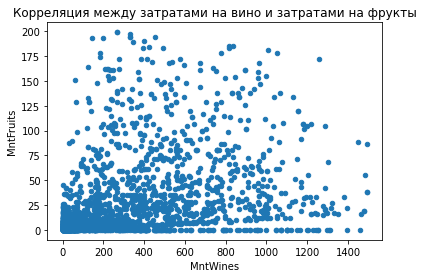

In [ ]:
df.plot(kind='scatter', 
        x='MntWines', 
        y='MntFruits', 
        title='Корреляция между затратами на вино и затратами на фрукты'
       )

Взаимосвязь слабо выражена

**Существует ли корреляция между ежегодными доходами и и затратами на покупки**

In [ ]:
df[['Purchase__amount', 'Income']].corr()

,Purchase__amount,Income
Purchase__amount,1.000000,0.664435
Income,0.664435,1.000000


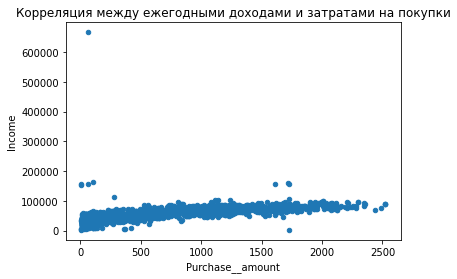

In [ ]:
df.plot(kind='scatter', 
        x='Purchase__amount', 
        y='Income', 
        title='Корреляция между ежегодными доходами и затратами на покупки'
       )

Средняя выраженность взаимосвязей

**Проверка гипотезы**

На рыбу и мясо тратятся одинаковые деньги


H0 - средние затраты на мясо и рыбу одинаковы

H1 - средние траты на покупку мяса и рыбы разные

In [ ]:
result = st.ttest_ind(df['MntMeatProducts'], df['MntFishProducts'], equal_var=False)

print(result)
print(df['MntMeatProducts'].mean())
print(df['MntFishProducts'].mean())

alpha = 0.05

if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу, Средние траты на рыбу и мясо не одинаковы')
else:
  print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=26.35833835244084, pvalue=2.6723564452433533e-135)
166.91685292802862
37.52302190433616
Отвергаем нулевую гипотезу, Средние траты на рыбу и мясо не одинаковы


**Есть ли зависимость между количеством детей в семье и тратами**

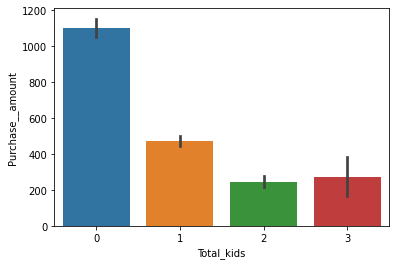

In [ ]:
# посмотрим визуально 

sns.barplot(x='Total_kids', y='Purchase__amount', data=df)


Интересно, что клиенты без детей тратят больше

# **Кластеризация**

Создание датасета, который будем использовать в кластеризации

In [ ]:
df_for_clusters = df[['level_edu', 'Count_people', 'Income', 'Total_kids', 
       'Recency', 'Purchase__amount', 'Total_purchases', 'accepted_cmp', 'Complain', 'Age', 'Customer_year']]

In [ ]:
df_for_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_edu         2237 non-null   int64  
 1   Count_people      2237 non-null   int64  
 2   Income            2237 non-null   float64
 3   Total_kids        2237 non-null   int64  
 4   Recency           2237 non-null   int64  
 5   Purchase__amount  2237 non-null   int64  
 6   Total_purchases   2237 non-null   int64  
 7   accepted_cmp      2237 non-null   int64  
 8   Complain          2237 non-null   int64  
 9   Age               2237 non-null   int64  
 10  Customer_year     2237 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 289.7 KB


In [ ]:
df_for_clusters.head()

,level_edu,Count_people,Income,Total_kids,Recency,Purchase__amount,Total_purchases,accepted_cmp,Complain,Age,Customer_year
0,3,1,58138.0,0,58,1617,22,1,0,64,9
1,3,1,46344.0,2,38,27,4,0,0,67,7
2,3,2,71613.0,0,26,776,20,0,0,56,8
3,3,2,26646.0,1,26,53,6,0,0,37,7
4,5,2,58293.0,1,94,422,14,0,0,40,7


Нормализация данных

In [ ]:
# приводим данные к единому масштабу 

scaler = StandardScaler()

In [ ]:
# fit-transform сразу обучается и преобразует данные

X_scaled = scaler.fit_transform(df_for_clusters)

**Поиск оптимального количества кластеров**

Метод локтя

In [ ]:
# строим график локтя
# создаем список для инерции

k_inertia = []

In [ ]:
# задаем диапазон кластеров
ks = range(1, 16)

for k in ks:
  clf_kmeans = KMeans(n_clusters=k)
  clusters_kmeans = clf_kmeans.fit_predict(X_scaled) 
  
# добавляем инерцию каждой модели в список
  k_inertia.append(clf_kmeans.inertia_)

Text(0.5, 0, 'Количество кластеров')

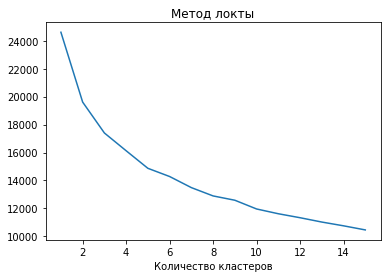

In [ ]:
plt.plot(ks, k_inertia)
plt.title('Метод локты')
plt.xlabel('Количество кластеров')

Определение коэффициента силуэта

In [ ]:
for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters = n_cluster).fit(X_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_scaled, label, metric='euclidean')
    print("Для n_clusters={}. Коэффициент силуэта равен {}".format(n_cluster, sil_coeff))

Для n_clusters=2. Коэффициент силуэта равен 0.20709522280632256
Для n_clusters=3. Коэффициент силуэта равен 0.21671341490228538
Для n_clusters=4. Коэффициент силуэта равен 0.17176516291130434
Для n_clusters=5. Коэффициент силуэта равен 0.15012986325788968
Для n_clusters=6. Коэффициент силуэта равен 0.15216318310555285
Для n_clusters=7. Коэффициент силуэта равен 0.12958956955712314
Для n_clusters=8. Коэффициент силуэта равен 0.12958466305341101
Для n_clusters=9. Коэффициент силуэта равен 0.1345017414586301


Оптимальное число кластеров - два. Но возьму на один больше 

**PCA для преобразования данных**

In [ ]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X_scaled)

**Применяем K-Means**

In [ ]:
# явно указываем количество кластеров

kmeans = KMeans(n_clusters=3)

In [ ]:
# fit_predict обучается на данных и каждому объекту присваивает кластер

clusters = kmeans.fit_predict(X)
clusters

array([0, 2, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
# добавляем к данным столбец с информацией о кластерах 

df_for_clusters['Cluster'] = clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Визуализация результата кластеризации**

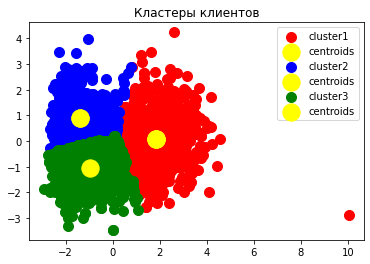

In [ ]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label='cluster1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label='cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label='cluster3')                                   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('Кластеры клиентов')
plt.legend()
plt.show()


**Иерархическая** кластеризация

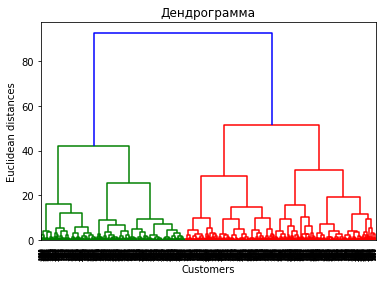

In [ ]:
# строим дендрограмму для определения числа кластеров

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Дендрограмма')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# используем модель иерархической кластеризации

AC = AgglomerativeClustering(n_clusters=3)

In [ ]:
pred = AC.fit_predict(X)

In [ ]:
# выведем кластеры

pred

array([1, 0, 1, ..., 1, 2, 2])

In [ ]:
# добавляем кластеры в датасет

df_for_clusters["AC"] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Визуализация результата иерархической кластеризации**

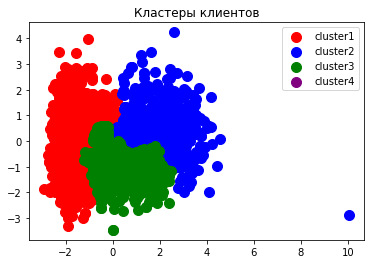

In [ ]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label='cluster1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label='cluster2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label='cluster3')                                   
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'purple', label='cluster4')                                   
plt.title('Кластеры клиентов')
plt.legend()
plt.show()


# Анализ полученных кластеров

**Модель KMeans**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


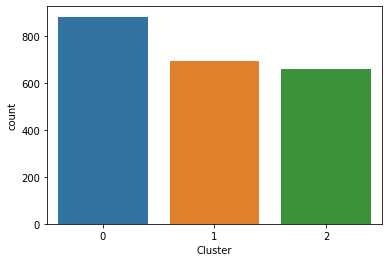

In [ ]:
# количество клиентов в каждом кластере 

sns.countplot(df_for_clusters['Cluster'])


In [ ]:
# посмотрим в табличном выражении 

df_for_clusters.Cluster.value_counts()

0    883
1    695
2    659
Name: Cluster, dtype: int64

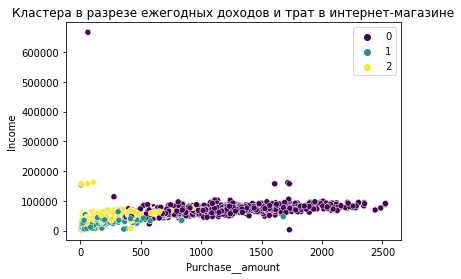

In [ ]:
# псмотрим на кластеры с позиции их доходов и трат 

pl = sns.scatterplot(data = df_for_clusters, x=df["Purchase__amount"], y=df["Income"], hue=df_for_clusters["Cluster"], palette='viridis')
pl.set_title("Кластера в разрезе ежегодных доходов и трат в интернет-магазине")
plt.legend()

Text(0.5, 1.0, 'Траты на покупки по кластерам')

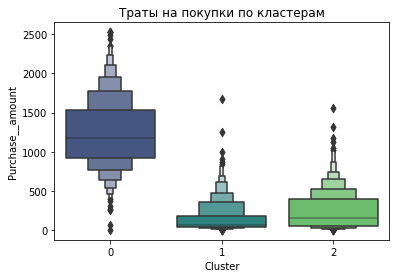

In [ ]:
# траты на покупки по кластерам

sns.boxenplot(x="Cluster", y="Purchase__amount", data=df_for_clusters, palette='viridis')
plt.title("Траты на покупки по кластерам")

Text(0.5, 1.0, 'Количество покупок по кластерам')

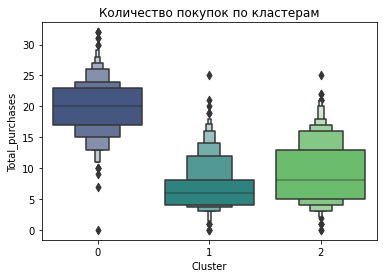

In [ ]:
# вохраст по кластерам 

sns.boxenplot(x="Cluster", y="Total_purchases", data=df_for_clusters, palette='viridis')
plt.title("Количество покупок по кластерам")

Основные параметры кластера 0

In [ ]:
df_for_clusters[df_for_clusters['Cluster'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,883.0,3.490374,1.079949,1.0,3.0,3.0,4.0,5.0
Count_people,883.0,1.612684,0.487413,1.0,1.0,2.0,2.0,2.0
Income,883.0,72097.830125,24003.331214,2447.0,63624.0,71434.0,79711.5,666666.0
Total_kids,883.0,0.476784,0.561697,0.0,0.0,0.0,1.0,3.0
Recency,883.0,49.498301,29.140732,0.0,24.0,51.0,74.0,99.0
Purchase__amount,883.0,1237.117780,434.277921,6.0,925.5,1174.0,1537.0,2525.0
Total_purchases,883.0,19.664779,4.154714,0.0,17.0,20.0,23.0,32.0
accepted_cmp,883.0,0.474519,0.499633,0.0,0.0,0.0,1.0,1.0
Complain,883.0,0.005663,0.075079,0.0,0.0,0.0,0.0,1.0
Age,883.0,53.927520,12.206062,26.0,45.0,54.0,64.0,80.0


Основные параметры кластера 1

In [ ]:
df_for_clusters[df_for_clusters['Cluster'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,695.0,2.703597,1.010707,1.0,2.0,3.0,3.0,5.0
Count_people,695.0,1.643165,0.479410,1.0,1.0,2.0,2.0,2.0
Income,695.0,32802.018705,12862.459786,1730.0,23477.5,31605.0,41282.5,70829.0
Total_kids,695.0,1.001439,0.581906,0.0,1.0,1.0,1.0,3.0
Recency,695.0,47.834532,28.869526,0.0,24.0,47.0,74.0,99.0
Purchase__amount,695.0,146.697842,181.931514,5.0,41.0,69.0,177.0,1679.0
Total_purchases,695.0,6.748201,3.717886,0.0,4.0,6.0,8.0,25.0
accepted_cmp,695.0,0.151079,0.358384,0.0,0.0,0.0,0.0,1.0
Complain,695.0,0.014388,0.119172,0.0,0.0,0.0,0.0,1.0
Age,695.0,44.014388,8.436221,25.0,38.0,44.0,49.0,74.0


Основные параметры кластера 2

In [ ]:
df_for_clusters[df_for_clusters['Cluster'] == 2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,659.0,3.996965,0.873446,1.0,3.0,4.0,5.0,5.0
Count_people,659.0,1.690440,0.462663,1.0,1.0,2.0,2.0,2.0
Income,659.0,46105.116085,14787.291738,4023.0,36938.5,46097.0,54423.0,162397.0
Total_kids,659.0,1.532625,0.706084,0.0,1.0,2.0,2.0,3.0
Recency,659.0,49.916540,28.798071,0.0,25.0,51.0,74.0,99.0
Purchase__amount,659.0,243.881639,233.430974,8.0,52.5,156.0,397.5,1562.0
Total_purchases,659.0,9.115326,4.841129,0.0,5.0,8.0,13.0,25.0
accepted_cmp,659.0,0.127466,0.333747,0.0,0.0,0.0,0.0,1.0
Complain,659.0,0.007587,0.086840,0.0,0.0,0.0,0.0,1.0
Age,659.0,58.172989,8.949052,35.0,51.0,58.0,66.0,81.0


**Иерархическая кластеризация**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Кластеры')

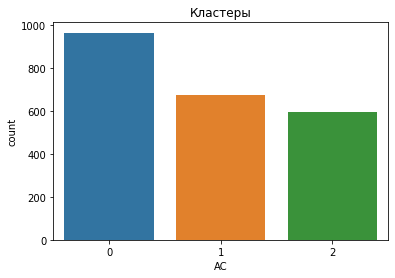

In [ ]:
# количество клиентов в каждом кластере 

sns.countplot(df_for_clusters['AC'])
plt.title("Кластеры")


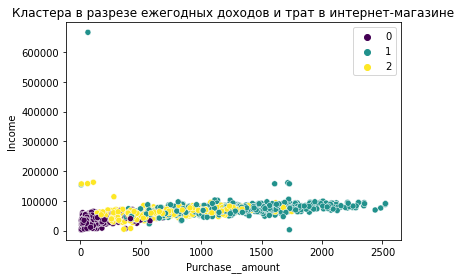

In [ ]:
# псмотрим на кластеры с позиции их доходов и трат 

pl = sns.scatterplot(data = df_for_clusters, x=df["Purchase__amount"], y=df["Income"], hue=df_for_clusters["AC"], palette='viridis')
pl.set_title("Кластера в разрезе ежегодных доходов и трат в интернет-магазине")
plt.legend()

Text(0.5, 1.0, 'Траты на покупки по кластерам')

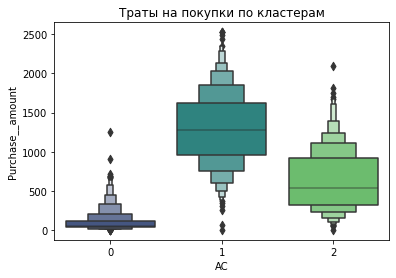

In [ ]:
# траты на покупки по кластерам

sns.boxenplot(x="AC", y="Purchase__amount", data=df_for_clusters, palette='viridis')
plt.title("Траты на покупки по кластерам")

Text(0.5, 1.0, 'Количество покупок по кластерам')

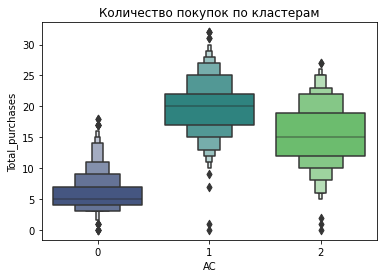

In [ ]:
# вохраст по кластерам 

sns.boxenplot(x="AC", y="Total_purchases", data=df_for_clusters, palette='viridis')
plt.title("Количество покупок по кластерам")

Основные параметры кластера 0

In [ ]:
df_for_clusters[df_for_clusters['AC'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,966.0,3.145963,1.159068,1.0,3.00,3.0,4.00,5.0
Count_people,966.0,1.649068,0.477509,1.0,1.00,2.0,2.00,2.0
Income,966.0,33940.487578,12042.490952,1730.0,25256.75,34081.0,42240.00,70829.0
Total_kids,966.0,1.275362,0.711674,0.0,1.00,1.0,2.00,3.0
Recency,966.0,49.780538,28.739413,0.0,25.00,49.0,76.00,99.0
Purchase__amount,966.0,104.556936,125.643126,5.0,37.00,60.0,114.75,1250.0
Total_purchases,966.0,5.924431,2.827600,0.0,4.00,5.0,7.00,18.0
accepted_cmp,966.0,0.114907,0.319075,0.0,0.00,0.0,0.00,1.0
Complain,966.0,0.012422,0.110819,0.0,0.00,0.0,0.00,1.0
Age,966.0,48.223602,10.449171,25.0,41.00,47.0,55.00,75.0


Основные параметры кластера 1

In [ ]:
df_for_clusters[df_for_clusters['AC'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,676.0,3.242604,1.058450,1.0,3.00,3.0,4.0,5.0
Count_people,676.0,1.612426,0.487557,1.0,1.00,2.0,2.0,2.0
Income,676.0,73164.122781,26871.244382,2447.0,63991.50,72344.5,80920.0,666666.0
Total_kids,676.0,0.380178,0.521102,0.0,0.00,0.0,1.0,2.0
Recency,676.0,48.757396,29.119122,0.0,23.75,49.0,73.0,99.0
Purchase__amount,676.0,1294.565089,461.612957,6.0,960.00,1281.5,1621.5,2525.0
Total_purchases,676.0,19.602071,4.376699,0.0,17.00,20.0,22.0,32.0
accepted_cmp,676.0,0.528107,0.499579,0.0,0.00,1.0,1.0,1.0
Complain,676.0,0.005917,0.076752,0.0,0.00,0.0,0.0,1.0
Age,676.0,50.704142,11.787302,26.0,42.00,50.0,60.0,80.0


Основные параметры кластера 2

In [ ]:
df_for_clusters[df_for_clusters['AC'] == 2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_edu,595.0,3.973109,0.909702,1.0,3.0,4.0,5.0,5.0
Count_people,595.0,1.675630,0.468533,1.0,1.0,2.0,2.0,2.0
Income,595.0,58147.227731,15070.656991,4428.0,49524.5,57906.0,66451.0,162397.0
Total_kids,595.0,1.072269,0.664000,0.0,1.0,1.0,1.0,3.0
Recency,595.0,48.401681,29.145317,0.0,23.0,50.0,72.0,99.0
Purchase__amount,595.0,636.840336,382.422404,8.0,319.0,542.0,921.5,2092.0
Total_purchases,595.0,15.272269,5.029524,0.0,12.0,15.0,19.0,27.0
accepted_cmp,595.0,0.235294,0.424539,0.0,0.0,0.0,0.0,1.0
Complain,595.0,0.006723,0.081785,0.0,0.0,0.0,0.0,1.0
Age,595.0,59.973109,9.563149,35.0,52.0,61.0,68.0,81.0


## Классификация

Построим модель, которая будет предсказывать участие/неучастие клиентов в маркетинговых кампаниях

In [ ]:
# готовим данные для классификации

df_for_class = df_for_clusters[['Cluster', 'Income', 'Age', 'level_edu', 'Count_people', 'Total_kids', 'accepted_cmp',  
                                'Purchase__amount', 'Complain', 'Total_purchases']]

In [ ]:
data_class = df_for_class.accepted_cmp
data = df_for_class[['level_edu', 'Count_people', 'Total_kids', 'Age', 'Cluster', 
                     'Purchase__amount', 'Complain', 'Total_purchases', 'Income']]

In [ ]:
# разделяем выборку на тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.30)

In [ ]:
lr = LogisticRegression()

In [ ]:
# обучаем модель

lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# результат

y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# оценка качества классификатора (объединяет точность и полноту)

f1_score(y_test, y_pred)
 

0.4483985765124555

In [ ]:
# посмотрим на точность / полноту / f-меру для каждого класса

report = metrics.classification_report(y_test, lr.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       482
           1       0.46      0.56      0.51       190

    accuracy                           0.69       672
   macro avg       0.64      0.65      0.64       672
weighted avg       0.71      0.69      0.70       672



In [ ]:
# матрица ошибок 

confusion_matrix(y_test, y_pred)


array([[454,  28],
       [127,  63]])

Text(0, 0.5, 'True {ositive Rate')

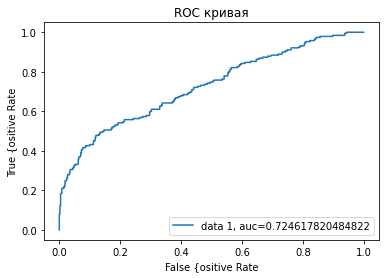

In [ ]:
# построим ROC кривую

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC кривая")
plt.xlabel("False {ositive Rate")
plt.ylabel("True {ositive Rate")

Модель плохо предсказывает тех клиентов, которые будут участвовать в маркетинговых кампаниях, а именно они нас и интересуют, чтобы направлять на них маркетинговые предложения. Поэтому попробуем поработать с различными подходами

Попробуем нормализовать данные

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))

In [ ]:
# разделим данные на обучающую и тестовую выборки

Xn_train, Xn_test, yn_train, yn_test = train_test_split(data, data_class, test_size=0.30)

In [ ]:
# нормализуем данные
sc.fit(Xn_train)
Xn_train = sc.transform(Xn_train)
Xn_test = sc.transform(Xn_test)

In [ ]:
# обучиим модель на нормализованных данных 

lr.fit(Xn_train, yn_train)

# делаем предсказание 
normal_pred = lr.predict(Xn_test)

In [ ]:
# посмотрим F-меру

f1_score(yn_test, normal_pred)

In [ ]:
# матрица ошибок

confusion_matrix(yn_test, normal_pred)


[[449  37]
 [123  63]]


Text(0, 0.5, 'True {ositive Rate')

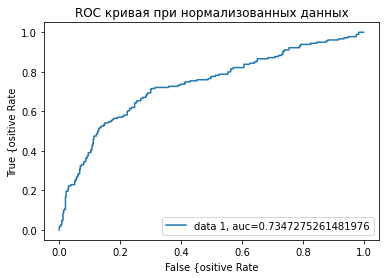

In [ ]:
# построим ROC кривую

y_pred_proba = lr.predict_proba(Xn_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yn_test,  y_pred_proba)
auc = metrics.roc_auc_score(yn_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC кривая при нормализованных данных")
plt.xlabel("False {ositive Rate")
plt.ylabel("True {ositive Rate")

При нормализации данных нет ощутимых изменений в работе модели

Поскольку у нас классы несбалансированы, то передискретизация может позитивно сказаться на работе модели, проверим это

In [ ]:
# разделим данные на две выборки

X_train_, X_test_, y_train_, y_test_ = train_test_split(data, data_class, test_size = 0.3, random_state = 10)

sm = SMOTE(random_state = 2)


X_train_res, y_train_res = sm.fit_resample(X_train_, y_train_.ravel())

# обучаем модель
model_res = lr.fit(X_train_res, y_train_res)

In [ ]:
# применяем обученную модель к тестовой выборке
pred_ = model_res.predict(X_test_)

In [ ]:
# посмотрим F-меру

f1_score(y_test_, pred_)

0.5226130653266332

In [ ]:
# матрица ошибок

confusion_matrix(y_test_, pred_)


array([[378, 118],
       [ 72, 104]])

Text(0, 0.5, 'True {ositive Rate')

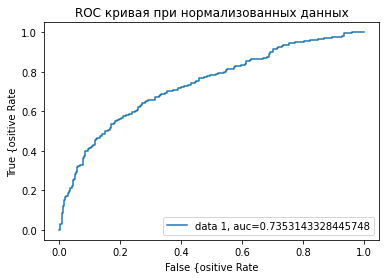

In [ ]:
# построим ROC кривую

y_pred_proba = lr.predict_proba(X_test_)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC кривая")
plt.title("ROC кривая при нормализованных данных")
plt.xlabel("False {ositive Rate")
plt.ylabel("True {ositive Rate")

Теперь модель гораздо лучше предсказывает клиентов, которые готовы поучаствовать в маркетингвых кампаниях

Попробуем применить алгоритм Random Forest

In [ ]:
# делим данные на обучающие и тестовые

X__train, X__test, y__train, y__test = train_test_split(data, data_class, test_size=0.3, stratify=data_class)

In [ ]:
# масштабируем данные 

X_train_scaled = scaler.fit_transform(X__train)
X_test_scaled = scaler.transform(X__test)
y__train = np.array(y__train)

In [ ]:
# обучим модель 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y__train)

RandomForestClassifier()

In [ ]:
# делаем предсказание для тестовых данных 

rfc.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# F-мера

f1_score(y__test, rfc.predict(X_test_scaled))

0.6402439024390244

In [ ]:
# матрица ошибок

confusion_matrix(y__test, rfc.predict(X_test_scaled))


array([[449,  40],
       [ 78, 105]])

Модель Random Forest работает лучше, чем логистическая регрессия